In [1]:
import cv2
import numpy as np
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import pickle
from random import randint


In [2]:
def read_image(path):
    img = np.asarray(Image.open(path))
    return img

def write_image_to_file(img, path):
    cv2.imwrite(path, img)
    
def draw_image(image):
    image = np.squeeze(image)
    plt.figure(figsize=(7, 7))
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.show()

def resize_image(img, resize_shape):
    res = cv2.resize(img, dsize=resize_shape, interpolation=cv2.INTER_CUBIC)
    return res    

In [46]:
def get_bounding_boxes(image):
    bboxes = []
    ret, thresh = cv2.threshold(img, 120, 255, 0)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    dilate = cv2.dilate(thresh, kernel, iterations=3)
#     draw_image(dilate)
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if (area > 400.0):
            x, y, w, h = cv2.boundingRect(cnt)
            crop = thresh[y:y+h, x:x+w]
            
            white_count = crop[crop > 1].shape[0]
            black_count = crop[crop < 1].shape[0]
#             print(while_count/black_count)
            
            if (white_count/black_count > 0.08):
                x, y, w, h = cv2.boundingRect(cnt)
                up_shift = int((128 - h) / 2)
                y = y - up_shift

                left_shift = int((128 - w) / 2)
                x = x - left_shift

#                 bboxes2 = [(x, y, 128, 128)]
                if (x >= 0 and y >= 0):
                    bboxes.append((x, y, 128, 128))
                else:
                    x, y, w, h = cv2.boundingRect(cnt)
                    bboxes.append((x, y, 128, 128))
    return bboxes
    

In [47]:
def draw_bboxes(gray_img, bboxes):
    img = cv2.cvtColor(gray_img,cv2.COLOR_GRAY2RGB)
    for b in bboxes:
        x, y, w, h = b
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    draw_image(img)

In [48]:
def crop_selection(img, bbox):
    x, y, w, h = bbox
    crop = img[y:y+h, x:x+w]
    return crop

[(149, 817, 128, 128)]


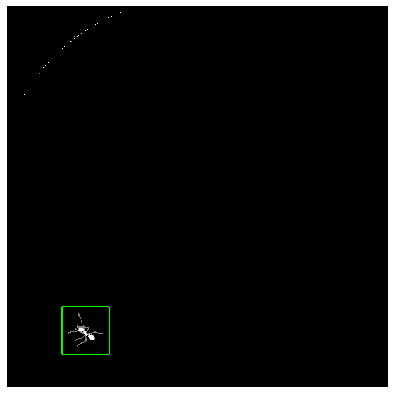

In [49]:
path_1 = "/Users/chamathabeysinghe/Projects/monash/test/variational_auto_encoder/data/ANTS2/sel_frames/1/ant_00013.png"
path_2 = "/Users/chamathabeysinghe/Projects/monash/test/variational_auto_encoder/data/ANTS2/sel_frames/1/ant_00063.png"
img = read_image(path_1)
bboxes = get_bounding_boxes(img)
# bboxes = [(bboxes[0][0], bboxes[0][1], 128, 128)]

print(bboxes)
draw_bboxes(img, bboxes)

In [50]:
image_path = '/Users/chamathabeysinghe/Projects/monash/qr-elimination/data/qr_embeded_dataset/raw_data/full_images/1'
mask_path = '/Users/chamathabeysinghe/Projects/monash/qr-elimination/data/qr_embeded_dataset/raw_data/full_image_masks/1'
crop_path = '/Users/chamathabeysinghe/Projects/monash/qr-elimination/data/qr_embeded_dataset/ant_cropped_images'

files = [x for x in os.listdir(mask_path) if not x.startswith('.')]


In [52]:
for file in files: 
    img = read_image(os.path.join(mask_path, file))
    bboxes = get_bounding_boxes(img)
    img_clr = read_image(os.path.join(image_path, file))
    crop = crop_selection(img_clr, bboxes[0])
#     draw_image(crop)
    write_image_to_file(crop, os.path.join(crop_path, file))
    
